In [59]:
from sklearn import tree
#from sklearn.datasets import load_wine
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [60]:
iris = load_iris()

In [61]:
iris.data.shape

(150, 4)

In [62]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [63]:
import pandas as pd
pd.concat([pd.DataFrame(iris.data),pd.DataFrame(iris.target)],axis=1)

,0,1,2,3,0
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [64]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [65]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [66]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(iris.data,iris.target,test_size=0.3)
#0.3表示30%做测试集，70%做训练集

In [67]:
Xtrain.shape

(105, 4)

In [68]:
iris.data.shape

(150, 4)

In [69]:
clf = tree.DecisionTreeClassifier(criterion="entropy")#信息熵
clf = clf.fit(Xtrain, Ytrain) #简单来说，就是求得训练集X的均值，方差，最大值，最小值这些训练集X固有的属性。
score = clf.score(Xtest, Ytest)
score
#决策树本身有随机性

0.9777777777777777

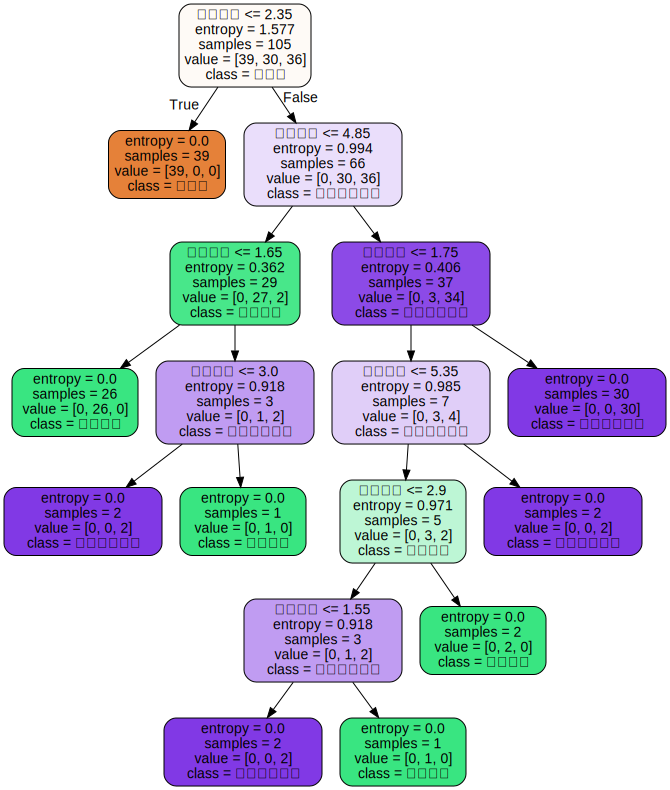

In [70]:
feature_name = ['花萼长度','花萼宽度','花瓣长度','花瓣宽度']

import graphviz
dot_data = tree.export_graphviz(clf
                                ,feature_names = feature_name
                                ,class_names=["山鸢尾","杂色鸢尾","维吉尼亚鸢尾"]
                               ,filled=True
                               ,rounded=True)
graph = graphviz.Source(dot_data)
graph
#图的颜色越浅，代表此结点的不纯度越高
#samples属性统计出它应用于多少个训练样本实例。
#value属性告诉你这个节点对于每一个类别的样例有多少个。如根节点，有40个琴酒，47个雪莉，37个贝尔摩德

In [71]:
clf.feature_importances_
#属性的重要性，数值越大对建树越重要

array([0.        , 0.02932658, 0.85816938, 0.11250404])

In [72]:
[*zip(feature_name,clf.feature_importances_)]

[('花萼长度', 0.0),
 ('花萼宽度', 0.029326576351103962),
 ('花瓣长度', 0.8581693832891855),
 ('花瓣宽度', 0.11250404035971057)]

In [73]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=30)
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score
#加上参数random_state后结果不会变化

0.9777777777777777

In [74]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=30
                                 ,splitter="random")
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

0.9555555555555556

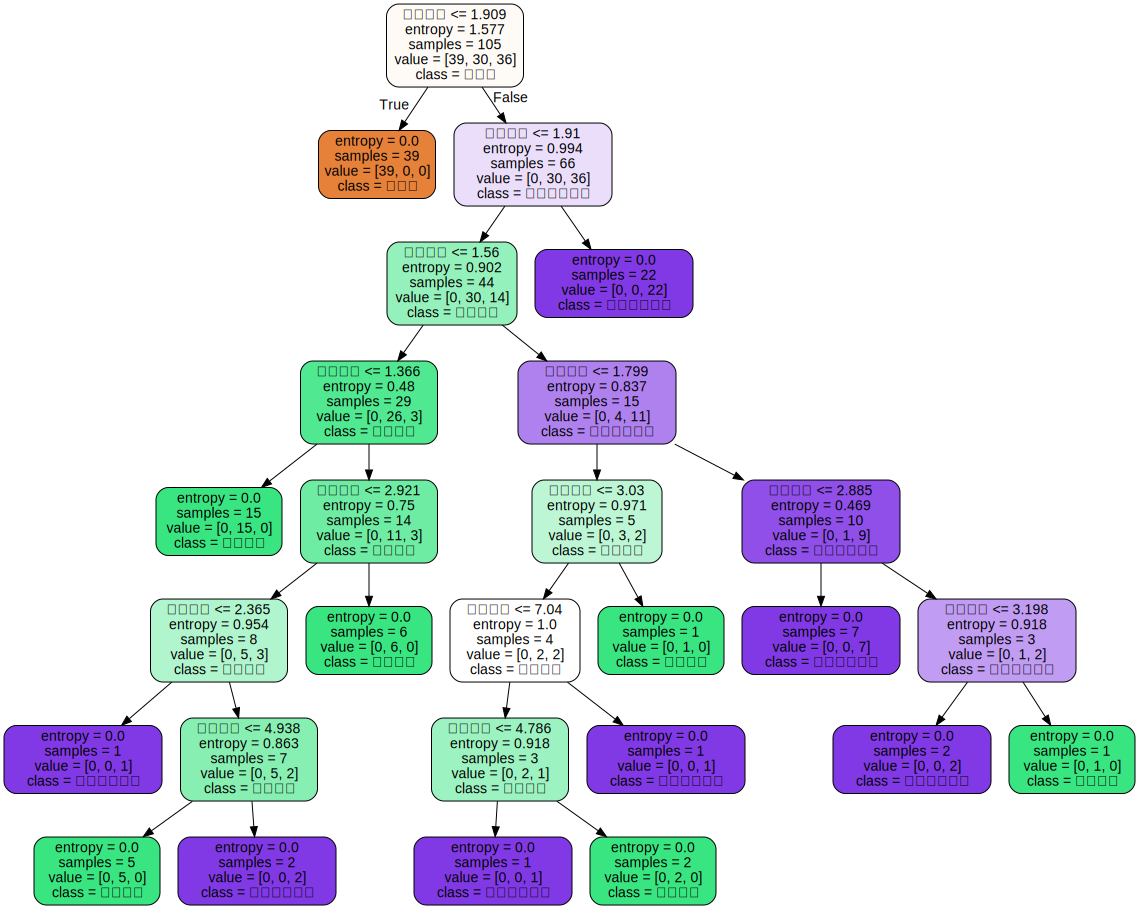

In [75]:
import graphviz
dot_data = tree.export_graphviz(clf
                                ,feature_names = feature_name
                                ,class_names=["山鸢尾","杂色鸢尾","维吉尼亚鸢尾"]
                               ,filled=True
                               ,rounded=True)
graph = graphviz.Source(dot_data)
graph

In [76]:
#我们的树对训练集的拟合程度如何？
score_train = clf.score(Xtrain, Ytrain)
score_train

1.0

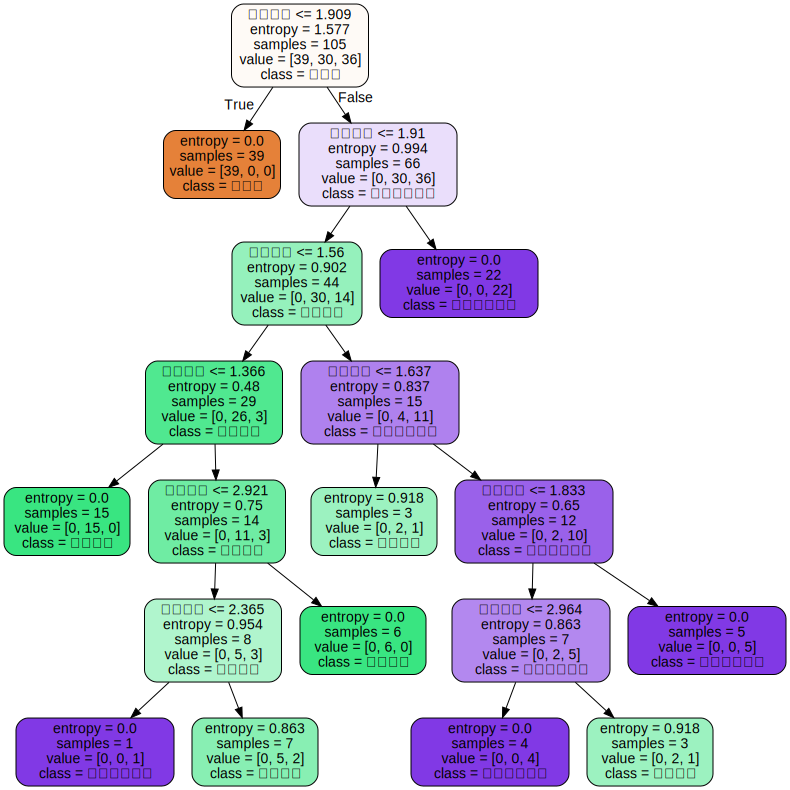

In [86]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  ,random_state=30
                                  ,splitter="random"
                                  ,max_depth=6
                                  #,min_samples_leaf=5
                                  ,min_samples_split=6
                                 )
clf = clf.fit(Xtrain, Ytrain)
dot_data = tree.export_graphviz(clf
                                ,feature_names= feature_name
                                ,class_names=["山鸢尾","杂色鸢尾","维吉尼亚鸢尾"]
                                ,filled=True,rounded=True
                               )
graph = graphviz.Source(dot_data)
graph

In [78]:
clf.score(Xtest,Ytest)

0.8666666666666667

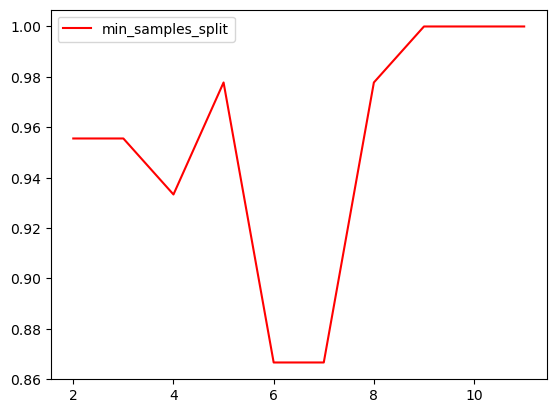

In [79]:
import matplotlib.pyplot as plt
test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(min_samples_split=i+2
                                     ,criterion="entropy"
                                     ,random_state=30
                                     ,splitter="random"
                                     )
    clf = clf.fit(Xtrain, Ytrain)
    score = clf.score(Xtest, Ytest)
    test.append(score)
plt.plot(range(2,12),test,color="red",label="min_samples_split")
plt.legend()
plt.show()

In [80]:
#apply返回每个测试样本所在的叶子节点的索引
clf.apply(Xtest)

array([12,  1,  1, 12,  7, 11,  5,  1,  1,  5,  5, 12,  5,  1,  5,  5,  1,
        1, 11,  5,  5,  8,  5, 12,  1,  1,  5, 10,  8,  5, 12, 12,  1,  1,
       11, 11, 11,  5, 12, 11, 11,  8,  5,  7,  8], dtype=int64)

In [81]:
#predict返回每个测试样本的分类/回归结果,返回标签
clf.predict(Xtest)

array([2, 0, 0, 2, 1, 2, 1, 0, 0, 1, 1, 2, 1, 0, 1, 1, 0, 0, 2, 1, 1, 1,
       1, 2, 0, 0, 1, 1, 1, 1, 2, 2, 0, 0, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1,
       1])

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.tree import DecisionTreeClassifier

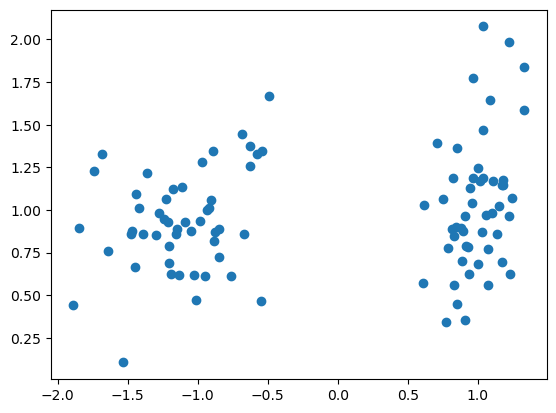

In [83]:
#make_classification库生成随机的二分型数据
X, y = make_classification(n_samples=100, #生成100个样本
                           n_features=2,  #包含2个特征，即生成二维数据
                           n_redundant=0, #添加冗余特征0个
                           n_informative=2, #包含信息的特征是2个
                           random_state=1, #随机模式1
                           n_clusters_per_class=1 #每个簇内包含的标签类别有1个
                           )
#在这里可以查看一下X和y，其中X是100行带有两个2特征的数据，y是二分类标签
#也可以画出散点图来观察一下X中特征的分布
plt.scatter(X[:,0],X[:,1])

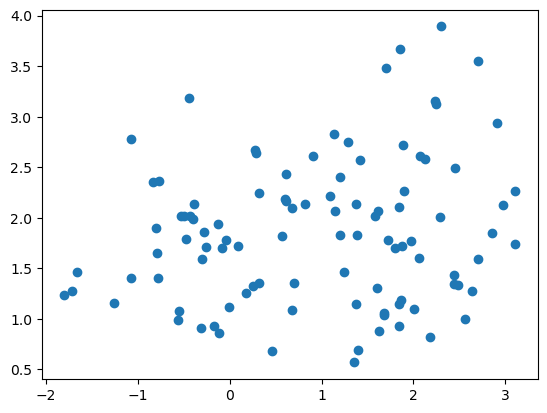

In [84]:
#从图上可以看出，生成的二分型数据的两个簇离彼此很远，这样不利于我们测试分类器的效果，因此我们使用np生成
#随机数组，通过让已经生成的二分型数据点加减0~1之间的随机数，使数据分布变得更散更稀疏
#注意，这个过程只能够运行一次，因为多次运行之后X会变得非常稀疏，
#两个簇的数据会混合在一起，分类器的效应会继续下降
rng = np.random.RandomState(2) #生成一种随机模式
X += 2 * rng.uniform(size=X.shape) #加减0~1之间的随机数
linearly_separable = (X, y) #生成了新的X，依然可以画散点图来观察一下特征的分布
plt.scatter(X[:,0],X[:,1])
#用make_moons创建月亮型数据，make_circles创建环形数据，并将三组数据打包起来放在列表datasets中
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

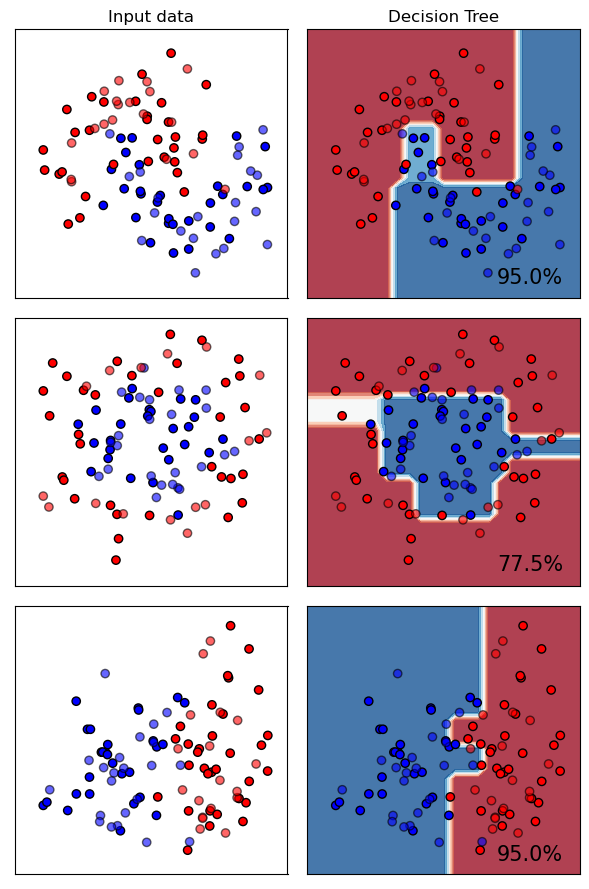

In [85]:
#创建画布，宽高比为6*9
figure = plt.figure(figsize=(6, 9))
#设置用来安排图像显示位置的全局变量i
i = 1
#开始迭代数据，对datasets中的数据进行for循环
for ds_index, ds in enumerate(datasets):
    
    #对X中的数据进行标准化处理，然后分训练集和测试集
    X, y = ds
    X = StandardScaler().fit_transform(X) 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)
    
    #找出数据集中两个特征的最大值和最小值，让最大值+0.5，最小值-0.5，
    #创造一个比两个特征的区间本身更大一点的区间
    x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    
    #用特征向量生成网格数据，网格数据，其实就相当于坐标轴上无数个点
    #函数np.arange在给定的两个数之间返回均匀间隔的值，0.2为步长
    #函数meshgrid用以生成网格数据，能够将两个一维数组生成两个二维矩阵。
    #如果第一个数组是narray，维度是n，第二个参数是marray，维度是m。
    #那么生成的第一个二维数组是以narray为行，m行的矩阵，
    #而第二个二维数组是以marray的转置为列，n列的矩阵
    #生成的网格数据，是用来绘制决策边界的，
    #因为绘制决策边界的函数contourf要求输入的两个特征都必须是二维的
    array1,array2 = np.meshgrid(np.arange(x1_min, x1_max, 0.2),
                                np.arange(x2_min, x2_max, 0.2))
    #接下来生成彩色画布
    #用ListedColormap为画布创建颜色，#FF0000正红，#0000FF正蓝
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    #在画布上加上一个子图，数据为len(datasets)行，2列，放在位置i上
    ax = plt.subplot(len(datasets), 2, i)
    
    if ds_index == 0:
        ax.set_title("Input data")
    
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, 
                cmap=cm_bright,edgecolors='k')
    
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, 
                cmap=cm_bright, alpha=0.6,edgecolors='k')
    
    ax.set_xlim(array1.min(), array1.max())
    ax.set_ylim(array2.min(), array2.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    #每次循环之后，改变i的取值让图每次位列不同的位置
    i += 1
    
    #######################以下为决策树模型###########################
    
    ax = plt.subplot(len(datasets),2,i)
    
    clf = DecisionTreeClassifier(max_depth=5)
    clf.fit(X_train,y_train)
    score = clf.score(X_test,y_test)
    
    Z = clf.predict_proba(np.c_[array1.ravel(),array2.ravel()])[:, 1]
    
    Z = Z.reshape(array1.shape)
    ax.contourf(array1, array2, Z, cmap=cm, alpha=.8)
    
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                edgecolors='k')
    
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                edgecolors='k', alpha=0.6)
    
    ax.set_xlim(array1.min(), array1.max())
    ax.set_ylim(array2.min(), array2.max())
    
    ax.set_xticks(())
    ax.set_yticks(())
    
    if ds_index == 0:
        ax.set_title("Decision Tree")
        
    ax.text(array1.max() - .3,array2.min() + .3,('{:.1f}%'.format(score*100)),
            size=15,horizontalalignment='right')
        
    i += 1
    
plt.tight_layout()
plt.show()